# Breast Cancer Detection
___

## Motivation:
This is one of the many "Hello World" machine learning problems in the field. Many data scientists rookies begin with this problem at the beginning of their journey. This means that a simple google search including *breast cancer detection* will lead any of you on many datasets and notebooks dealing with the solutions.

So **the motivation** here is not to (once again) follow the Machine learning project process from dataset to the solution but to get deeper at each step of the process to not only understand why each step is necessary but also and especially to understand deeply how it is performed on a mathematical and statistical basis.

I believe that is the only why to really master the technics and the concept behind every line of code. But before get to coding, an important step (may be the first one to perform) is to get used to the problem and the data by trying to understand what each features (or column or attribute or statiscal variable) means for the probelm at hand.

For juniors or beginners this work can help discovery what Data science work looks like and for more experienced people of teh data world this could be a revision session.

## 1. Understand the problem context:
You will find on the [Kaggle](https://www.kaggle.com/d3evil3/breast-cancer-detection) page an indepth description of the problem. So for summary's sake, let's just stress some major points here.

> *My tips for this first part is to write a little summary like the one below for details to stick into your head.*

### 1.1 What breast cancer
Breast cancer is a major common malignancy cancer among women. It occurs as a results of **abnormal growth of cells in the breast tissue, commonly referred to as a Tumor**. A tumor does not mean cancer as tumors can be *benign (then not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous)*. So pre-malignant and malignant tumors are cells **of your own body** that behave in a different way and keep dividing and pushes the other cells around it out of the way.
These cells start invading into the tissues around it and sometimes entering the bloodstream and becoming what is called **a metastasis**.

> The following tests are commonly used to diagnose breast cancer:
* MRI
* Mammogram
* Ultrasound
* Biopsy

### 1.2 Defining the analytic approach
What we are trying to do is to use some data to ease the detection process. Even if the later will always need the advice of an expert de confirm the diagnosis, we can imagine that a ML solution could be used at first hand to help the expert focus on positive patient.

Looking at the data in a Excel sheet **(*if possible this step is a must to build a first impression of teh data at hand*)** we can see that:
* There are **9 features or predictors** corresponding to cells characteristics
* The last column named *"class"* corresponds to what we want to predict AKA **the target**

Even if our target seems to only have numerical values (**2 - for benign, 4 - for malignant**) the later should be considered as a **nominal (without order) categorical statistical variable**. Thus the analytic approach to implement should be **a classification problem**.

### 1.3 Data source and creator
> **Data source:**
* The data that we will use for this project come from the [UCI data repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer)

> * Another data source is in the [Kaggle data repository](https://www.kaggle.com/d3evil3/breast-cancer-detection/data). Please pay very close attention to the data range of the later data source when building the ML solution... Fill free to contact me is you don't understand what I mean.

> **Creator of the UCI dataset:**
* Dr. WIlliam H. Wolberg (physician)
* University of Wisconsin Hospitals
* Madison, Wisconsin, USA

## 2. ML experimentation and developmeent:
The first part of this notebook was about getting a first impression without too deep insights. The ppurpose of this kind of first exploration was to **design the ML solution** (i.e establishing functional and non-functional requirements).

In this ML experimention part, we will focus on digging deeper into the data first and secondly experiment with ML algorithms.


### 2.1 Quick data exploration
Now is time to get our hands dirty, but never without thinking first about what we are trying to achieve. Loading the data means import the data into a IDE (Integrated development environment) - in our case a jupyter Notebook on Colab or Anaconda.

In [1]:
# Let's import the basic necessary librairies
# Tensor manipulation
import numpy as np

# Dataframe manipulation
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('precision', 3)

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the dataset
csv_path = '/content/drive/MyDrive/Colab Notebooks/Breast_cancer_detection/breastCancer.csv'
#An alternative: pd.read_csv(csv_path, converters={'bare_nucleoli': lambda x: np.nan if x=='?' else int(x)})
df = pd.read_csv(csv_path)

# display the 5 first rows
df.head(10)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
# print the shape of the dataset:
print('The shape of the dataset: ', df.shape)
print('The shape is about knowing exactely how many sample (Nr of rows) and how many features (Nr of columns) do we have in our dataset')

The shape of the dataset:  (699, 11)
The shape is about knowing exactely how many sample (Nr of rows) and how many features (Nr of columns) do we have in our dataset


In [4]:
# Display the data types
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

Displaying the data type of each columns is about knowing if we are dealing with numérical values or else. Depending on the type, we won't be able to use some python methods or technics. So it is always a good start to look at data type de plan, if any, what we call the **feature engineering** strategies (or the strategy of data transformation.

In [5]:
# sumarize the distribution of each attribute (or features)
df.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990e+02,699.000,699.000,699.000,699.000,699.000,699.000,699.000,699.000,699.000
mean,1.072e+06,4.418,3.134,3.207,2.807,3.216,3.438,2.867,1.589,2.690
std,6.171e+05,2.816,3.051,2.972,2.855,2.214,2.438,3.054,1.715,0.951
min,6.163e+04,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000
25%,8.707e+05,2.000,1.000,1.000,1.000,2.000,2.000,1.000,1.000,2.000
50%,1.172e+06,4.000,1.000,1.000,1.000,2.000,3.000,1.000,1.000,2.000
75%,1.238e+06,6.000,5.000,5.000,4.000,4.000,5.000,4.000,1.000,4.000
max,1.345e+07,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,4.000


These are what we can observe from this first exploration:
* There are 699 samples with 11 columns (the lat column being our target)
* Apart from the `id` column and the target the `class` column), the features numerical values range from 1 to 10 (this meaning they are approximetely in the same range)
* From the above 'count' row we can see that there are no missing values in any of the samples (i.e. **impute** or filling missing values strategy won't be needed)
* Something seems to be wrong with the `bare_nucleoli` column which doesn't appear in the summary table and has an **object data type** despite the fact the all the data seems to be numerical
* All the others columns are interger data type

These info are the bare minimum you need to ask yourself when looking at a dataset to spot issues like on `bare_nucleoli`. 

To proceed you need to fix the issue on the later. So let's display a description and the distribution of this columns which seem to be an *object* data type **AKA categorical**.

In [6]:
# display the description of bare_nucleoli
print(df['bare_nucleoli'].describe(), '\n')
print('unique modalities or bare_nucleoli column: ', df['bare_nucleoli'].unique()) #.value_counts(normalize=True))

count     699
unique     11
top         1
freq      402
Name: bare_nucleoli, dtype: object 

unique modalities or bare_nucleoli column:  ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


2    14
4     2
Name: class, dtype: int64


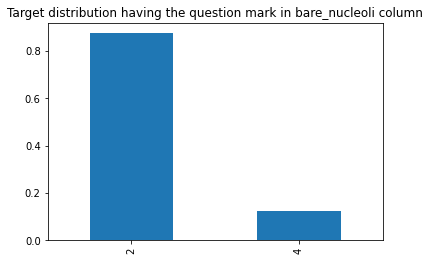

In [7]:
# the class distribution among the 2.3%
df.loc[df['bare_nucleoli'] == '?', 'class'].value_counts(normalize=True).plot.bar()
plt.title('Target distribution having the question mark in bare_nucleoli column')
print(df.loc[df['bare_nucleoli'] == '?', 'class'].value_counts())

We can see that among the modalities **there is a question mark**. On the associated samples, we can make the following observations:
* There are 16 samples **(representing about 2.3% of the sample)**
* Among the 2.3% there are 90% tagged as not cancerous and 10% as cancerous.

We can then ask ourselves what does the question mark means? (that the data is missing or something else?). The answer to that question require some field knowledge and to know more about the data collection process. **To proceed we will assume that the question mark is equivalent to a missing value. But you should note that you on a real project you shoudn't bother NOT asking the question!**

To fix the issue we have the following options:
1. Drop the associated samples (i.e dropping the associated rows)
2. Impute the missing values with the mean value
3. Impute the missing values with the median value of teh distribution
4. Use an ML algorithm to predict what the missing value could be.

The first strategy is the easiest but could modify the dataset distribution. In our case with the missing value representing only about 2.3% of the entire dataset, this could be a valid solution. The last solution is a more complex one that could be used in a last resort.

Apart from the question mark, all the others modalities of the bare_nucleoli column seem to be of type integer, so we can't really use the mean imputing strategy. **We will choose to impute the missing values with the median value.**

> **Note the fact that you should always ask yourself what are the possible strattegies before going on. Every thing you choose to do should be volontary and not by default**

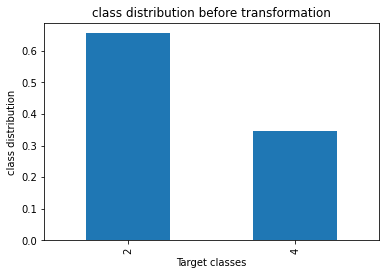

In [8]:
# Display the target distribution before transformation
df['class'].value_counts(normalize=True).plot(kind='bar')
plt.title('class distribution before transformation')
plt.xlabel('Target classes')
plt.ylabel('class distribution')
plt.show()

Let's now transform the bare_nucleoli column. For this we will impute the missing values with the median value. Since that is the only operation that we will perform, no need to implement a pipeline *(otherwise a pipeline would be needed to avoid anay data leak)*.

In [9]:
# Imputing the missing value

# Change the question marks to NaN
# alternative 1: df['bare_nucleoli'] = df['bare_nucleoli'].replace('?', np.nan)
df['bare_nucleoli'] = pd.to_numeric(df['bare_nucleoli'], errors='coerce', downcast='integer')

# Fill NaN with median values
df['bare_nucleoli'] = df['bare_nucleoli'].fillna(df['bare_nucleoli'].median())

# Convert value to integer data type
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

# display the result
print(df.dtypes)

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object


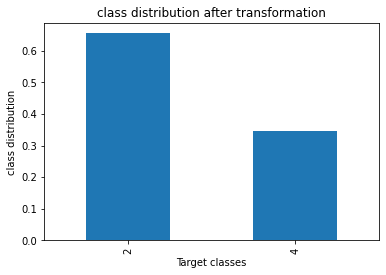

In [10]:
# Display the target distribution after transformation
df['class'].value_counts(normalize=True).plot(kind='bar');
plt.title('class distribution after transformation')
plt.xlabel('Target classes')
plt.ylabel('class distribution')
plt.show()

We can conclude from this plot that the imputation strategy (as expected) doesn't change the class repartition and that the class **are not imbalanced** (the classes' repartition - that needs special technics - is not an issue)

### 2.2 Exploratory Data Analysis (EDA)

This part intention is to actually build knowledge from series of numbers. Since we are only dealing with numerical value, this means that we need to build a statistical understanding on each features *(i.e. how are their respective distribution, where is located the mean, the median etc.)*.

> Start to study each feature alone and then group then together.

#### Unimodal data **visualisation**

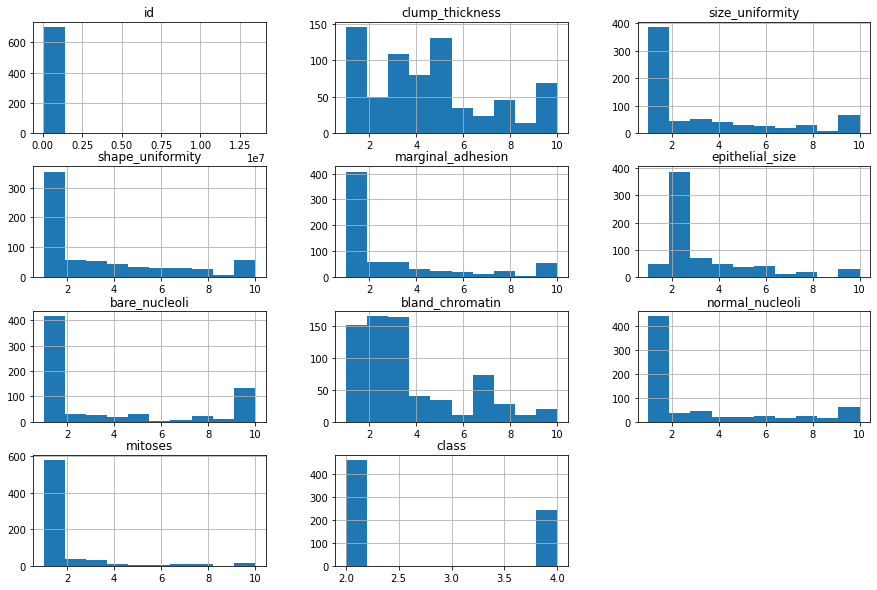

In [11]:
# features histograms
df.hist(figsize=[15, 10]);

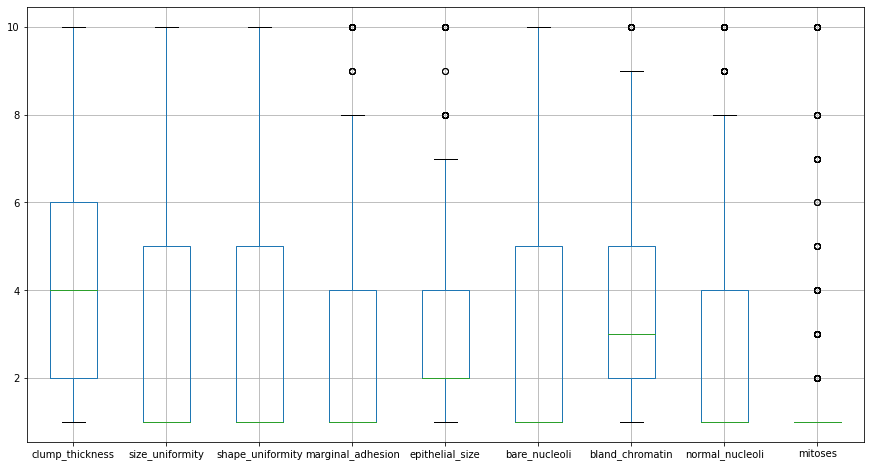

In [12]:
# Boxplot
df.iloc[:,1:-1].boxplot(figsize=(15, 8));

Despite the fact that all the features range from 2 to 10, their respective distributions are quite different.

The distributions are far from normally distributed (the most frequent values are far from the distributions' centers). Some features have **outliers** that skew the distribution mostly to the right.

#### Multimodal Data visualizations

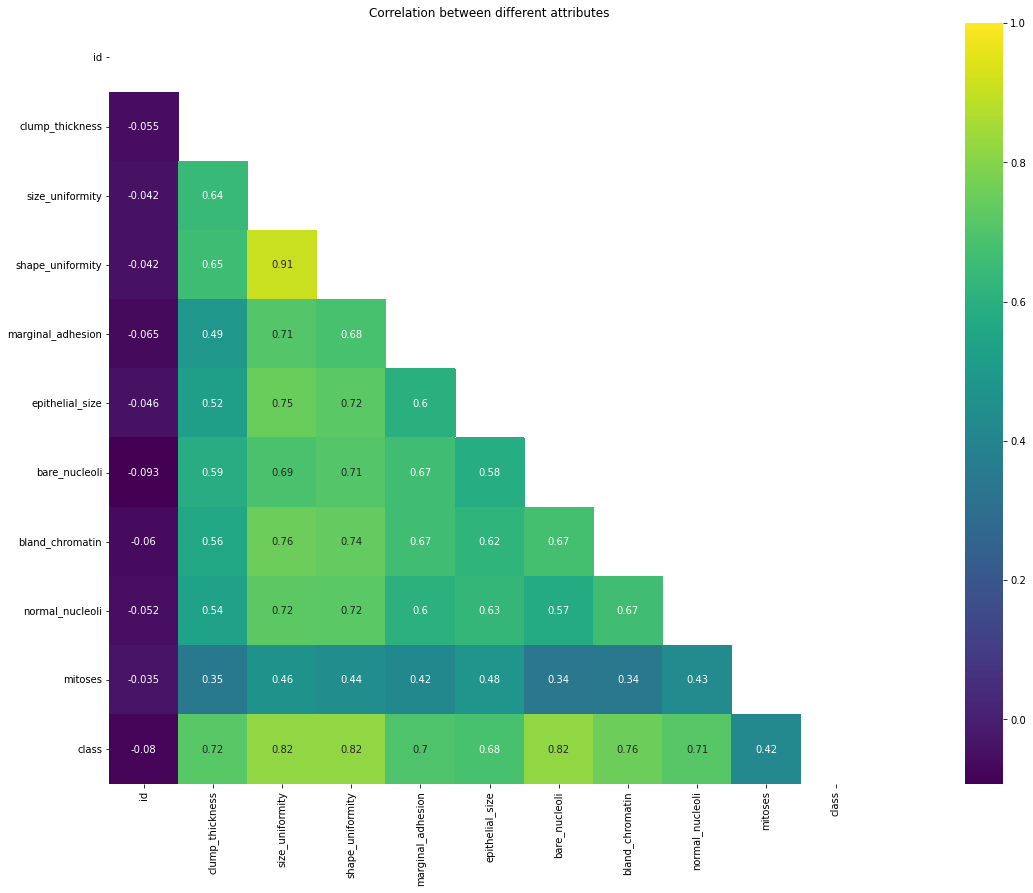

In [13]:
# Heatmap of the correlation between attributes
plt.figure(figsize=(34,14))

# create a mask
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
sns.heatmap(df.corr(), vmax=1, square=True,annot=True,mask = mask, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

Light green show highly correlated features.

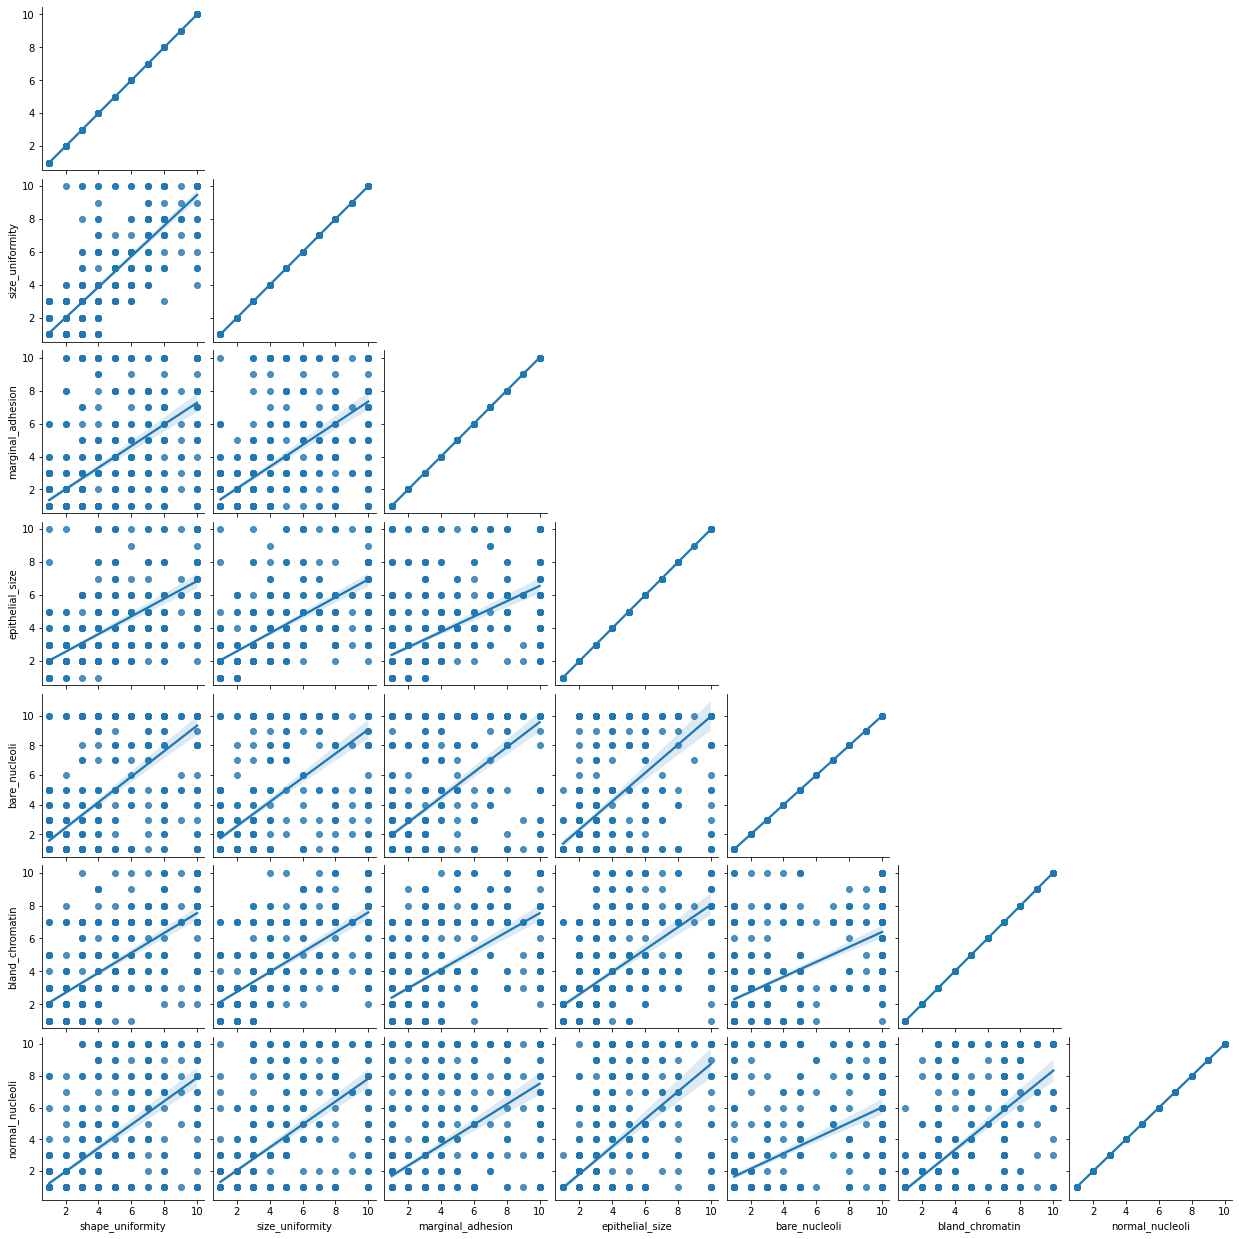

In [14]:
# create a pairplot
cols = ['shape_uniformity', 'size_uniformity', 'marginal_adhesion', 'epithelial_size', 
        'bare_nucleoli', 'bland_chromatin', 'normal_nucleoli']

sns.pairplot(df.loc[:, cols], corner=True, diag_kind=None, kind='reg');

These are the observations that we can make:
* Apart from the target and the dump_thickness column, the others features a not normaly distributed (the mean values are not at the distributions' centers)
* Shape_uniformity and size_uniformity seem to be highly correlated with several others attributes
* shape_uniformity, size_uniformity and bare_nucleoli have teh same distributions
* Some features seem to have outliers
* The id column seems to be not correlated with any others features.

#### PCA Analysis
Finally, let's perform a **PCA analysis** to asses what kind of ML algorithm can we use:

In [15]:
# import of necessary librairies
from sklearn.decomposition import PCA

In [16]:
# perform the PCA analysis to get only 2 components
pca = PCA(n_components=2)
data_2D = pca.fit_transform(df.iloc[:, 1:-1])

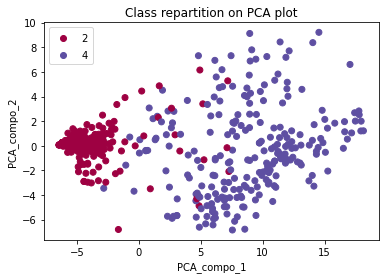

In [17]:
# plot the class with PCA components
scatter = plt.scatter(data_2D[:,0], data_2D[:,1], c=df['class'], cmap=plt.cm.Spectral)

# add legend with values
plt.legend(*scatter.legend_elements())

plt.title('Class repartition on PCA plot')
plt.xlabel('PCA_compo_1')
plt.ylabel('PCA_compo_2')
plt.show()

In [18]:
# Print the explained variance
pca.explained_variance_ratio_

array([0.68900383, 0.07337931])

We can clearly identify 2 clusters corresponding to the binary classes. An imaginary line can clearly achieve a reasonable clusters separation. This means that we can use linear algoorithms like **Logistic regression**.

Moreover, from the above line of code we can see that the first PCA component explain about 68% of the total variance and the second component allow to explain about 7.3%. This means that the first component achieve a better separation than the second component.

#### Manifold analysis

In [19]:
# import the necessary librairies
from sklearn.manifold import Isomap

In [20]:
# perform the anaysis
isomap = Isomap(n_components=2)
data_2D_iso = isomap.fit_transform(df.iloc[:, 1:-1])

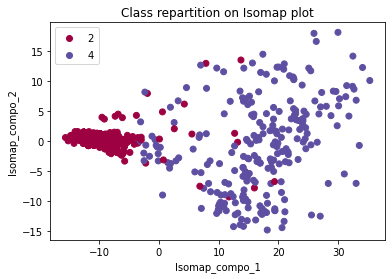

In [21]:
# plot the class with PCA components
scatter_iso = plt.scatter(data_2D_iso[:,0], data_2D_iso[:,1], c=df['class'], cmap=plt.cm.Spectral)

# add legend with values
plt.legend(*scatter_iso.legend_elements())

plt.title('Class repartition on Isomap plot')
plt.xlabel('Isomap_compo_1')
plt.ylabel('Isomap_compo_2')
plt.show()

#### Feature importances analysis


In [22]:
# import 
from sklearn.ensemble import RandomForestClassifier

# Train de algorithm
rdf = RandomForestClassifier(n_jobs=-1).fit(df.iloc[:, 1:-1], df['class'])

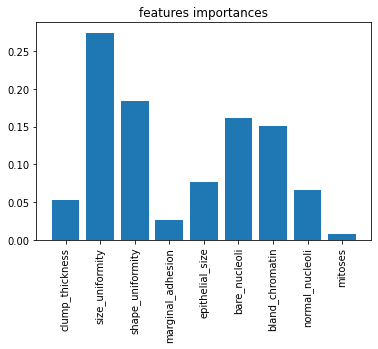

In [23]:
# plot features importance
plt.bar(df.iloc[:, 1:-1].columns, rdf.feature_importances_)
plt.title('features importances')
plt.xticks(rotation=90)
plt.show()

Comparing the above chart with the correlation plot, we can deduct that:
* `mitoses` columns has the least contribution for the classification. The feature can then be droppped
* As the `size_uniformity` and `shape_uniformity` are highly correlated, we could only consider the first feature (the one with the highest feature importance) for the analysis

Of course, those hypotheses have to be checked and confirmed and not just assumed. To be continued...

### 2.3 Dataset split

Now is time to split the data so that we would be able to properly assess the performance of the final model. To do so, we need to keep some data away from the training process.

So first the data are divided into the feature and the target part, and then the features are splitted into a train (*to litterally train or models*) and a test (*to asses the performance on data unseen by the created models*) parts

In [24]:
# import necessary librairies
from sklearn.model_selection import train_test_split

# splitting feature en target
target = df[['class']]
features = df.iloc[:, 1:-1]

# train \ test split
test_fraction = .2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_fraction, random_state = seed)

# print data shape (number of sample, numbers of columns) just to be sure
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
X_train.head(3)

X_train shape: (559, 9)
X_test shape: (140, 9)


,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
319,4,4,4,4,6,5,7,3,1
132,5,10,8,10,8,10,3,6,3
148,3,1,1,3,8,1,5,8,1


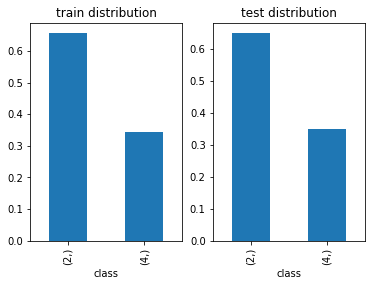

In [25]:
# plot the train \ test target distribution
plt.subplot(121)
y_train.value_counts(normalize=True).plot.bar()
plt.title('train distribution')
plt.subplot(122)
y_test.value_counts(normalize=True).plot.bar()
plt.title('test distribution')
plt.show()

### 2.4 Evaluate Algorithms: Establishing the baseline

In [26]:
# importing the necessary librairies
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Linear models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Non-linear models
from sklearn.neighbors import KNeighborsClassifier #AKA KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # Support vector Machine
from sklearn.naive_bayes import GaussianNB

In [27]:
# Spot-Checking algorithms

# models list:
models = [
          ('LR', LogisticRegression()),
          ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()),
          ('DTC', DecisionTreeClassifier()),
          ('NB', GaussianNB()),
          ('SVM', SVC())
]

# The scoring metric
scoring = 'accuracy'

# Number of folds to consider for teh KFold strategy
num_folds = 10

In [41]:
# Defining our spot checking algorithms
def spot_check_function(model_list, num_folds, seed, scoring, x, y):
  results = []
  names = []
  for name, model in model_list:
    # splitting strategy: dividing the train dataset
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    # calculate the score for each fold
    result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    # printing results
    #print('%s: mean = %f and std = %f)'% (name, result.mean(), result.std()))
    # store the results
    results.append(result)
    # store the model name
    names.append(name)
  return names, results

#
def get_kfold_results(alg_list, results_list):
    results_df = pd.DataFrame()
    for name, elt in zip(alg_list, results_list):
      results_df[name] = elt
    return results_df
#
def get_averaged_results(alg_list, pred_list):
  name_list = []
  mean_list = []
  std_list = []
  for name, elt in zip (alg_list, pred_list):
    name_list.append(name)
    mean_list.append(elt.mean())
    std_list.append(elt.std())
    #print('%s: mean = %f and std = %f)'% (name, elt.mean(), elt.std()))

  res_df = pd.DataFrame({'alg_name': name_list,'mean_acc': mean_list, 'std_acc': std_list}).set_index('alg_name')
  return res_df

In [42]:
# apply the function on X_train and y_train
alg_names, pred_results = spot_check_function(models, num_folds, seed, scoring, X_train, y_train)

# store the kold results into a Dataframe
results_df = get_kfold_results(alg_names, pred_results)

# display results
results_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,LR,LDA,KNN,DTC,NB,SVM
0,0.982,0.946,0.964,0.911,0.982,0.982
1,0.982,0.982,1.000,0.982,0.964,0.964
2,0.911,0.911,0.929,0.911,0.893,0.911
3,0.982,0.964,0.982,0.911,0.982,1.000
4,0.982,0.982,0.982,0.875,0.964,0.964
5,0.964,0.964,0.964,0.946,0.964,0.982
6,1.000,1.000,1.000,1.000,0.982,1.000
7,0.893,0.911,0.929,0.911,0.946,0.929
8,0.964,0.946,0.946,0.911,0.964,0.964
9,0.982,0.982,0.964,0.927,0.945,0.982


In [39]:
# display results
mean_results_df = get_averaged_results(alg_names, pred_results)
mean_results_df

,mean_acc,std_acc
alg_name,,
LR,0.964,0.033
LDA,0.959,0.029
KNN,0.966,0.025
DTC,0.930,0.035
NB,0.959,0.025
SVM,0.968,0.027


Looking at averaged results, the **SVM, KNN and Logistic regression** models have the bes accuracy results (with approximately similar standard deviation)

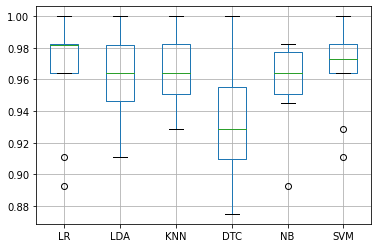

In [31]:
# compare the algorithms
results_df.boxplot()
plt.show()

Looking at the above chart (with median values and inter-quartile ranges) we can clearly see **Logistic regression and SVM** standing out.

Now let's see if standardizing the data change anything. We can already guest that the standardizing coud affect the linear and the KNN algorithms' performances

### 2.5 Evaluate algorithms: with Standardized Data
Since we want the standardize our date before applying the ML algorithms, we **must** use a pipeline to avoid any data leak during the steps sequences. So:
* Step 1: standardizing the data
* Step 2: applying the ML algorithm

In [32]:
# import the pipeline librairie
from sklearn.pipeline import Pipeline

# import the scaling librairies
from sklearn.preprocessing import StandardScaler

In [33]:
# model list:
models_with_pipe = [
          ('scaledLR', Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression())])),
          ('scaledLDA', Pipeline([('scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])),
          ('scaledKNN', Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])),
          ('scaledDTC', Pipeline([('scaler', StandardScaler()), ('DTC', DecisionTreeClassifier())])),
          ('scaledNB', Pipeline([('scaler', StandardScaler()), ('NB', GaussianNB())])),
          ('scaledSVM', Pipeline([('scaler', StandardScaler()), ('SVM', SVC())]))
]

In [43]:
# apply the function on X_train and y_train
alg_names_pipe, pred_results_pipe = spot_check_function(models_with_pipe, num_folds, seed, scoring, X_train, y_train)

# store the kold results into a Dataframe
results_df_pipe = get_kfold_results(alg_names_pipe, pred_results_pipe)

# displaying the results
results_df_pipe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,scaledLR,scaledLDA,scaledKNN,scaledDTC,scaledNB,scaledSVM
0,0.982,0.946,0.982,0.929,0.982,0.982
1,1.000,0.982,1.000,0.964,0.964,0.964
2,0.911,0.911,0.946,0.893,0.893,0.893
3,0.964,0.964,1.000,0.946,0.982,1.000
4,0.982,0.982,0.982,0.893,0.964,0.964
5,0.964,0.964,0.964,0.946,0.964,0.982
6,1.000,1.000,1.000,1.000,0.982,1.000
7,0.911,0.911,0.929,0.911,0.946,0.946
8,0.964,0.946,0.946,0.929,0.964,0.964
9,0.982,0.982,0.964,0.927,0.945,0.982


In [44]:
# display results
mean_results_df_pipe = get_averaged_results(alg_names_pipe, pred_results_pipe)
mean_results_df_pipe

,mean_acc,std_acc
alg_name,,
scaledLR,0.966,0.030
scaledLDA,0.959,0.029
scaledKNN,0.971,0.024
scaledDTC,0.934,0.031
scaledNB,0.959,0.025
scaledSVM,0.968,0.030


Now let's pause a min to explain thing a little bit. If we focus on Logistic regression, KNN and SVM we can see that:
* The SVM model accuracy remained the same (-->a non linear model is not affacted by the standardizing)
* The logistic regression and the KNN models' accuracies remainded approximetely the same (--> since the data range is the same for all of the features, the standardizing step desn't bring much but allow a litttle improvement)

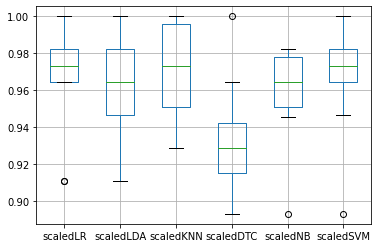

In [36]:
# compare the algorithms
results_df_pipe.boxplot()
plt.show()

Even after standardizing, the Logistic regression and the SVM are still standing out. So these are the models that we will use next.

> **An important tip here is that in the previous steps we didn't only randomly tried some algorithms and hope for the best. We instead select different models typologies and compared them at once using the KFold strategy to get a significant value to compare**

Now that we've selected **Logistic regression and SVM**, the nex step is to try build even tougher models with the **Grid search strategy**. The aim of this strategy is to find the best possible parameters to use with the selected models that will yield the best possible benchmark.

### 2.6 Models Tuning

#### Tuning Logistic regression

These are the LR parameters than we will try:
* solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
* C (knowing that stronger values mean stronger regularization)

For the complete set of parameters, just check the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

In [45]:
# import ncessary libraries
from sklearn.model_selection import GridSearchCV

In [ ]:
# numbers of neighbors to use
#neighbors = np.arange(1, 22, 2)

# parameters grid
param = {'LR__C': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
         'LR__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Data standardizing + modeling: not ncessary but since the accuracy is a litle bit increased we can choose to do it as well
LR_pipe_model = Pipeline([('Standardizing', StandardScaler()),('LR', LogisticRegression())])

# KFold strategy
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Grid search strategy
LR_grid = GridSearchCV(estimator=LR_pipe_model, param_grid=param, scoring=scoring, cv=kfold)

# fit the model
LR_grid_results = LR_grid.fit(X_train, y_train)


In [87]:
# print the best result
print("Best: %f using %s" %(LR_grid_results.best_score_, LR_grid_results.best_params_))

Best: 0.971396 using {'LR__C': 0.01, 'LR__solver': 'liblinear'}


#### Tuning SVM

In [106]:
np.linspace(0.002, 1, 5)

array([0.002 , 0.2515, 0.501 , 0.7505, 1.    ])

In [ ]:
# Mmodeling: As we know that standardizing is not necessarily needed
svm = SVC()

# parameters grid
param = {'C': np.arange(0.1, 10, 0.2),
         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # 'precomputed is only used with square kernel
         'gamma': ['scale', 'auto'],
         }#'gamma': np.linspace(0.002, 1, 5)} # could be tested as well

# KFold strategy
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Grid search strategy
svm_grid = GridSearchCV(estimator=svm, param_grid=param, scoring=scoring, cv=kfold)

# fit the model
svm_grid_results = svm_grid.fit(X_train, y_train)

In [112]:
# print the best result
print("Best: %f using %s" %(svm_grid_results.best_score_, svm_grid_results.best_params_))

Best: 0.969610 using {'C': 1.1000000000000003, 'gamma': 'scale', 'kernel': 'rbf'}


In [105]:
# display the 5 first gris search results
pd.DataFrame({'means':svm_grid_results.cv_results_['mean_test_score'], 
              'stds':svm_grid_results.cv_results_['std_test_score'],
              'params':svm_grid_results.cv_results_['params']}).sort_values(by='means', ascending=False).head()

,means,stds,params
143,0.97,0.028,"{'C': 1.5000000000000004, 'gamma': 0.002, 'ker..."
682,0.97,0.028,"{'C': 6.900000000000001, 'gamma': 0.002, 'kern..."
902,0.97,0.028,"{'C': 9.100000000000001, 'gamma': 0.002, 'kern..."
542,0.97,0.031,"{'C': 5.500000000000001, 'gamma': 0.002, 'kern..."
922,0.97,0.028,"{'C': 9.3, 'gamma': 0.002, 'kernel': 'rbf'}"


#### Tuning conclusion

Tuning the best models brougth a little change for both models. We ended up with:
* 97.1% accuracy with Logistic regression (after data standardizing)
* 97% accuracy with SVM (without standardizing)

So we are sure now that both models are equally qualified and everything will depends on the performances on the test set. But before the last check, let's try to do better with boosting and bagging methods to be sure we've got the best possible models.

### 2.7 Ensemble methods (boosting an dbagging)
These methods use decision tree based algorithms to find the best possible prediction split with the best possible features.

In [89]:
# import the necessary libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [ ]:
# Ensemble methods' list
ensemble_model_list = [
                 ('adaboost', AdaBoostClassifier()),
                 ('gdboost', GradientBoostingClassifier()),
                 ('RF', RandomForestClassifier()),
                 ('ET', ExtraTreesClassifier())
]

# apply the function on X_train and y_train
alg_names, pred_results = spot_check_function(ensemble_model_list, num_folds, seed, scoring, X_train, y_train)

# store the kold results into a Dataframe
results_df = get_kfold_results(alg_names, pred_results)

# display results
#results_df

# display averaged results
mean_results_df = get_averaged_results(alg_names, pred_results)
#mean_results_df

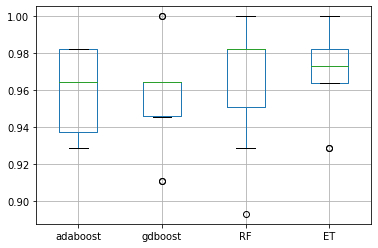

In [91]:
# plot boxplotq
results_df.boxplot();

In [93]:
# Averaged results
mean_results_df.sort_values(by='mean_acc', ascending=False)

,mean_acc,std_acc
alg_name,,
ET,0.968,0.022
RF,0.964,0.031
adaboost,0.961,0.022
gdboost,0.957,0.029


WE can see that even though out of the box, the ensemble methods accuracies are equivalent to tuned previous models. Let's keep it 'simple' and continue with the SVM model with tuned parameters.

### 2.8 Final model and final test

In [113]:
# initialize the model:
svm_final = SVC(C=1.1, 
                gamma='auto', 
                kernel='rbf')
svm_final

SVC(C=1.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [114]:
# import necessary librairie
from sklearn.metrics import classification_report

#  train the model
svm_final.fit(X_train, y_train)

# print the accuracy
print('train accuracy', svm_final.score(X_train, y_train))
print('test accuracy', svm_final.score(X_test, y_test))

# perform prediction
svm_final_pred = svm_final.predict(X_test)

# print the classification report
print(classification_report(svm_final_pred, y_test))

train accuracy 1.0
test accuracy 0.9642857142857143
              precision    recall  f1-score   support

           2       0.96      0.99      0.97        88
           4       0.98      0.92      0.95        52

    accuracy                           0.96       140
   macro avg       0.97      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
# display the confusion matrix
pd.crosstab(svm_final_pred, np.array(y_test['class'].tolist()), colnames=['predicted'], rownames=['true'])

predicted,2,4
true,,
2,87,1
4,4,48
